In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("student_scores_train.csv")
x_train = np.array(df_train["Hours"])
y_train = np.array(df_train["Scores"])
m_train = x_train.shape[0]

In [3]:
df_test = pd.read_csv("student_scores_test.csv")
x_test = np.array(df_test["Hours"])
y_test = np.array(df_test["Scores"])
m_test = x_test.shape[0]

In [4]:
x_train = x_train.reshape(1,m_train) # 1 x 19
y_train = y_train.reshape(1,m_train) # 1 x 19

In [5]:
x_test = x_test.reshape(1,m_test) # 1 x 6
y_test = y_test.reshape(1,m_test) # 1 x 6

Cost Function:
$$J(w,b) = \frac{ 1}{2m}   \sum^{m}_{i=1}(y^{(i)}-h_{w,b}(x^{(i)}))^{2} $$
Calculate the gradients:
$$ h_{w,b}(x) = w* x +b$$ 
$$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m ((h_{w,b}(x^{(i)})-y^{(i)})* x^{(i)})$$
$$ \space = \frac{1}{m}X(h_{w,b}(x)-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h_{w,b}(x^{(i)})-y^{(i)})$$

We will assume that:
$$ \frac{\partial J}{\partial w} = dw $$
$$ \frac{\partial J}{\partial b} = db $$


In [6]:
w , b , epochs , learning_rate = 0 , 0 , 10000 , 1e-3
for _ in range(epochs):
    hyp = w*x_train + b # 1 x 9
    dw = (1/m_train)*np.dot(x_train,(hyp - y_train).T) # (1 x 19) . (19 x 1) = 1 x 1
    db = (1/m_train)*np.sum((hyp - y_train)) # 1 x 1
    
    w = w - learning_rate * dw[0][0]
    b = b - learning_rate * db

print(w,b)

9.632430332698828 2.6945590974979217


In [7]:
hyp = w*x_test + b
cost = (1/m_train)*0.5*np.sum((y_test - hyp) ** 2)
print(cost,hyp,y_test)

4.847426360295467 [[73.97454356 28.702121   48.93022469 39.29779436 69.15832839 77.82751569]] [[69 30 54 35 76 86]]


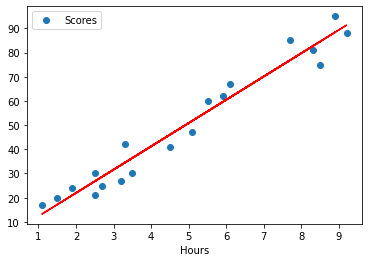

In [8]:
hyp_train =  w*x_train + b
df_train.plot(x='Hours', y='Scores', style='o')
plt.plot(x_train[0],hyp_train[0],color="red")
plt.show()
